In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

class SmallWorldModularNetwork(object):
    def __init__(self, p, num_nodes, num_subnets):
        """
        Initialise modular network.

        Inputs:
   i         p          n  -- Rewiring probability
            num_nodes    -- Nugmber of nodes in a sub-network
            num_subnets  -- Number of subnets in the network
        """
        self.num_nodes = num_nodes         # Number of nodes in a sub-network 
        self.num_subnets = num_subnets     # Number of subnets in the network
        self.N = num_nodes * num_subnets   # Total number of nodes in the network

        self._p = p

        # Initialise weight adjacency matrix for modular network 
        self.W = np.zeros([self.N, self.N])

        # Update intra-subnetwork blocks
        for i in range(0, self.N, num_nodes):
            Wblock = self._intraSubnetworkConnections(num_nodes)
            self.W[i:i + num_nodes, i:i + num_nodes] = Wblock

        # Apply rewiring process
        self._rewireConnectivity()


    def _intraSubnetworkConnections(self, N):
        """
        Generates excitatory-to-excitatory connections according to specification.

        Inputs:
            N -- The number of nodes in the sub-network.

        Outputs:
            W -- The connectivity matrix for the subnetwork community.
        """

        # Number of connections in this excitatory module
        N_edges = N * 2 

        # Initialise weight and delay matrix for subnetwork 
        W = np.zeros((N, N))

        # Generate all possible edges to sample from 
        all_edges = []
        for i in range(N):
            for j in range(N):
                if i == j:
                    continue
                all_edges.append((i, j))
                all_edges.append((j, i))

        # Uniformly sample N_edges connections 
        idxs = np.random.choice(len(all_edges), size=N_edges, replace=False)
        edges = [all_edges[idx] for idx in idxs]

        # Set connection weight to be 1 for randomly generated connections
        # Set random delays for these connections simultaneously.
        for edge in edges:
            W[edge] = 1 

        return W


    def _rewireConnectivity(self):
        """
        Rewires the connections between subnetworks with probability p.

        Inputs:
            p  -- Rewiring probability 
        """

        src, tgt = np.where(self.W[:self.N, :self.N] > 0)
        for s, t in zip(src, tgt):
            if np.random.random() < self._p:
                self.W[s, t] = 0
                # Pick index of new node to rewire to. It can't be an existing
                # connection or itself (because the total density has to be preserved)
                h = s
                while s == h or self.W[s, h]:
                    h = np.random.randint(self.N)
                self.W[s, h] = 1 


    def plotConnectivityMatrix(self):
        """
        Plots connectivity matrix for subnetworks. 
        """

        y, x = np.where(self.W[:self.N, :self.N] > 0)
        plt.scatter(x, y, s=1)
        plt.title(f'p = {self._p}')
        plt.xlabel('to')
        plt.ylabel('from')
        plt.ylim(self.N, 0)
        plt.xlim(0, self.N)
        plt.show()


# num_nodes = 100
# num_subnets = 8 
# p = 0.1 

# for p in [0, 0.2, 0.4, 0.6, 0.8, 1]:
#     network = SmallWorldModularNetwork(p, num_nodes, num_subnets)
#     network.plotConnectivityMatrix()


# Plot the small-world index, modularity, average clustering coefficient, and global efficiency as a function of p 

# Set the range for log-space
log_p_min = -3
log_p_max = 0

# Generate 100 uniformly distributed values in the log-space range
log_p_values = np.linspace(log_p_min, log_p_max, 100)

# Convert log-space values to linear space
p_values = 10**log_p_values

# Initialise arrays to store the small-world index, modularity, average clustering coefficient, and global efficiency
small_world_index = np.zeros_like(p_values)
modularity = np.zeros_like(p_values)
avg_clustering_coefficient = np.zeros_like(p_values)
global_efficiency = np.zeros_like(p_values)

# Set the number of nodes and subnets
num_nodes = 100
num_subnets = 8

# Iterate over each value of p

# for i, p in reversed(list(enumerate(p_values))):
#     # Create the network
#     instance = SmallWorldModularNetwork(p, num_nodes, num_subnets)
#     network = nx.from_numpy_array(instance.W)

#     print("Doing p = ", p)

#     # Calculate the small-world index
#     print("Calculating small world index")
#     try:
#         small_world_index[i] = nx.algorithms.smallworld.sigma(network)
#     except:
#         small_world_index[i] = 0

#     # Calculate the modularity
#     print("Calculating modularity")
#     try:
#         modularity[i] = nx.algorithms.community.modularity(network)
#     except:
#         modularity[i] = 0

#     # Calculate the average clustering coefficient
#     print("Calculating average clustering coefficient")
#     try:
#         avg_clustering_coefficient[i] = nx.algorithms.cluster.average_clustering(network)
#     except:
#         avg_clustering_coefficient[i] = 0

#     # Calculate the global efficiency
#     print("Calculating global efficiency")
#     try:
#         global_efficiency[i] = nx.algorithms.global_efficiency(network)
#     except:
#         global_efficiency[i] = 0

# # Plot the small-world index, modularity, average clustering coefficient, and global efficiency as a function of p on the same plot
# plt.plot(p_values, small_world_index, label='Small-world index')
# plt.plot(p_values, modularity, label='Modularity')
# plt.plot(p_values, avg_clustering_coefficient, label='Average clustering coefficient')
# plt.plot(p_values, global_efficiency, label='Global efficiency')
# plt.xlabel('p')
# plt.ylabel('Metric value')
# plt.xscale('log')
# plt.legend()
# plt.show()


In [2]:
%pip install bctpy

Note: you may need to restart the kernel to use updated packages.


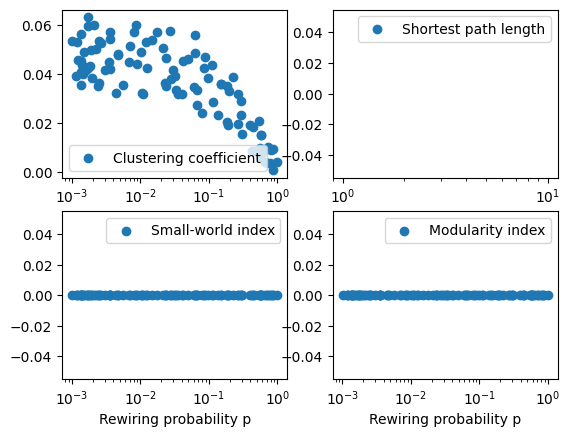

In [20]:
# N = 25
# N_subnet = 8
# nb_samples = 100
# p_vec = 10**(-3*rn.rand(nb_samples))
# cc = np.zeros_like(p_vec)
# pl = np.zeros_like(p_vec)
# sw = np.zeros_like(p_vec)
# mod = np.zeros_like(p_vec)

# for i,p in enumerate(p_vec):
#   net = SmallWorldModularNetwork(p, N, N_subnet)
# #   net.plotConnectivityMatrix()
#   CIJ = net.W
#   DD = bct.breadthdist(CIJ)[1]
#   cc[i] = bct.clustering_coef_bu(CIJ).mean()
#   pl[i], _, _, _, _ = bct.charpath(DD)
# #   le[i] = bct.efficiency_bin(CIJ, local=True).mean()
# import networkx as nx

# # Create a network graph
# G = nx.Graph()

# # Add edges to the graph

# # Calculate the average clustering coefficient
# cc = nx.average_clustering(G)

# # Calculate the average shortest path length
# l = nx.average_shortest_path_length(G)

# # Calculate the small world index
# swi = cc / l

# print("Small World Index:", swi)
# results = {'Clustering coefficient': cc, 'Shortest path length': pl,
#            'Small-world index': sw, 'Modularity index': mod}

# for i, lbl in enumerate(results.keys()):
#   ax = plt.subplot(2, 2, i+1)
#   ax.scatter(p_vec, results[lbl], label=lbl)
#   ax.set_xscale('log')
#   plt.legend()
#   if i > 1:
#     ax.set_xlabel('Rewiring probability p')

# plt.show()


Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here

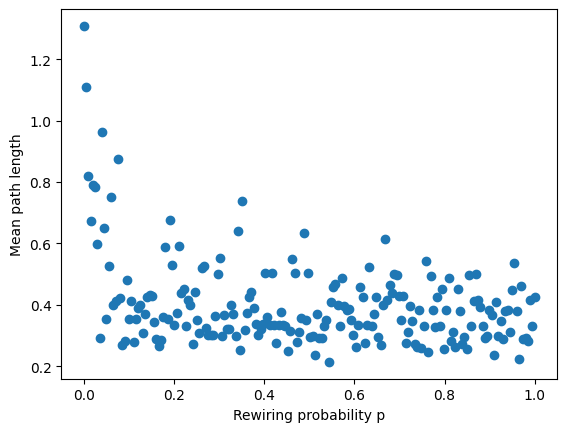

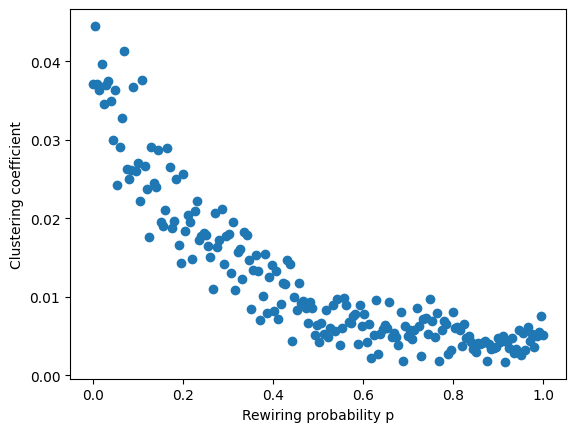

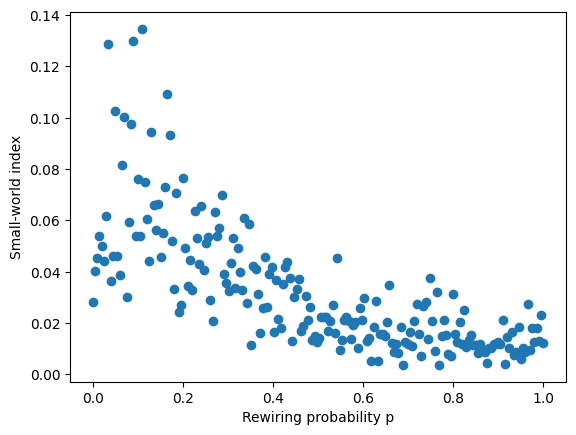

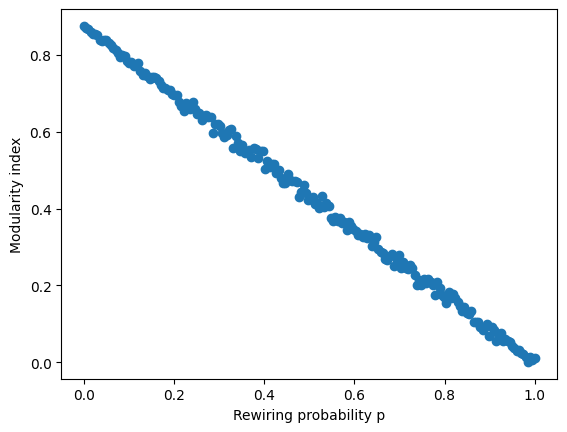

In [5]:
N = 100
N_subnet = 8
nb_samples = 200
p_vec = np.linspace(0, 1, nb_samples)
cc = np.zeros_like(p_vec)
pl = np.zeros_like(p_vec)
sw = np.zeros_like(p_vec)
mod = np.zeros_like(p_vec)

import statistics
from itertools import chain


communities = []
for i in range(0, N*N_subnet, N):
    communities.append(set(np.arange(i, i+N)))

for i,p in enumerate(p_vec):
  net = SmallWorldModularNetwork(p, N, N_subnet)
  G = nx.from_numpy_array(net.W)
  cc[i] = nx.average_clustering(G)
  pl[i] = average_shortest_path_length_for_all(G)
  sw[i] = cc[i] / pl[i]
  mod[i] = nx.algorithms.community.modularity(G, communities=communities)

results = {'Clustering coefficient': cc, 'Shortest path length': pl,
           'Small-world index': sw, 'Modularity index': mod}

# for i, lbl in enumerate(results.keys()):
#   ax = plt.subplot(2, 2, i+1)
#   ax.scatter(p_vec, results[lbl], label=lbl)
#   plt.legend()
#   if i > 1:
#     ax.set_xlabel('Rewiring probability p')

plt.scatter(p_vec, pl)
plt.xlabel('Rewiring probability p')
plt.ylabel('Mean path length')
plt.show()

plt.scatter(p_vec, cc)
plt.xlabel('Rewiring probability p')
plt.ylabel('Clustering coefficient')
plt.show()

plt.scatter(p_vec, sw)
plt.xlabel('Rewiring probability p')
plt.ylabel('Small-world index')
plt.show()

plt.scatter(p_vec, mod)
plt.xlabel('Rewiring probability p')
plt.ylabel('Modularity index')
plt.show()


In [3]:
def average_shortest_path_length_for_all(G):
    tempgraph=G.copy()
    if nx.is_connected(tempgraph):
        # Normal case, the graph is connected
        average=nx.average_shortest_path_length(tempgraph)
    else:
        print("Here!")
        # Compute the average shortest path for each subgraph and mean it!
        # subgraphs = nx.connected_component_subgraphs(tempgraph)
        subgraphs = [G.subgraph(c) for c in nx.connected_components(tempgraph)]
        average=0
        for sb in subgraphs:
            average+=nx.average_shortest_path_length(sb)
        average/=(len(subgraphs)*1.0)
    return average